In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
class_b = pd.read_csv('class B.csv')

In [3]:
inv = pd.read_csv('inventory.csv')

In [4]:
class_b.columns = ['New SKU'] #replacing that column

In [5]:
inv_b = pd.merge(inv,class_b, how='inner', on= 'New SKU')

In [6]:
inv_b.to_csv('inv_bdata.csv')

**Forecast**

In [7]:
inv_b = pd.read_csv("class_bFinal.csv")

In [8]:
inv_b.head()

,week,inv
0,07-02-2019,2.0
1,14-02-2019,7.0
2,21-02-2019,2.0
3,28-02-2019,7.0
4,07-03-2019,3.0


In [9]:
#Convert month into date and time
inv_b['week'] = pd.to_datetime(inv_b['week'])

In [10]:
#week as a index
inv_b.set_index('week', inplace = True)

In [11]:
inv_b.head()

,inv
week,
2019-07-02,2.0
2019-02-14,7.0
2019-02-21,2.0
2019-02-28,7.0
2019-07-03,3.0


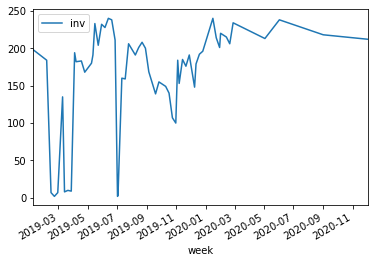

In [12]:
inv_b.plot()
#In the below graph the data doesnot show any seasonality and also its not stationary since there is no trend in the series

In [13]:
#testing for stationary
from statsmodels.tsa.stattools import adfuller

In [14]:
test_result = adfuller(inv_b['inv'])
#adfuller gives 5 different values (ADF Test statistic', 'p-value', 'Lags used', 'Number of observations used)
#it will defined in labels downwards (Dickey-Fuller Test)

In [15]:
#H0 - it is not stationary (null hypothesis)
 #H1 - It is stationary

#if p is less than 0.05, then we can reject the null hypothesis. so it is stationary
def ad_fuller(sales):
    result = adfuller(sales) #it calculates all the relevant 4 values
    labels = ['ADF Test statistic', 'p-value', '#Lags used', 'Number of observations used'] #creating a output
    for value,label in zip(result, labels): #using zip to collect all values result and the labels altogether
        print (label+' : '+str(value) )
    if result[1] <= 0.05:
        print("We reject the null hypothesis. Data is stationary.")
    else:
        print("We can not reject null hypothesis. Data is not stationary")

In [16]:
ad_fuller(inv_b['inv'])

ADF Test statistic : -2.518837039026385
p-value : 0.11095808164516391
#Lags used : 0
Number of observations used : 57
We can not reject null hypothesis. Data is not stationary


In [17]:
inv_b['inv after first diff.'] = np.log(inv_b['inv']) #doing first order differentiation

In [18]:
ad_fuller(inv_b['inv after first diff.']) #checking now, still data is not stationary.

ADF Test statistic : -3.3717966588180928
p-value : 0.01195872835559135
#Lags used : 0
Number of observations used : 57
We reject the null hypothesis. Data is stationary.


<Figure size 864x576 with 0 Axes>

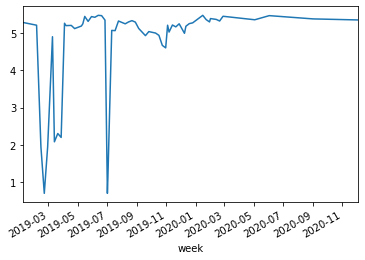

<Figure size 864x576 with 0 Axes>

In [19]:
#plot and check
inv_b['inv after first diff.'].plot()
plt.figure(figsize = (12,8))

In [20]:
from pandas.plotting import autocorrelation_plot

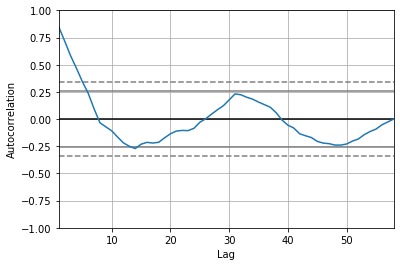

In [21]:
autocorrelation_plot(inv_b['inv'])
plt.show()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorelation or partial auto correlation
import statsmodels.api as sm

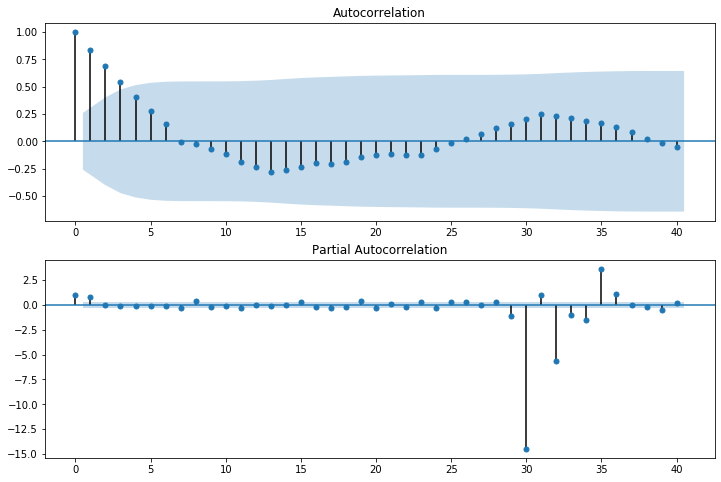

In [23]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(inv_b['inv'].iloc[1:], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(inv_b['inv'].iloc[1:], lags = 40, ax = ax2)
# for ARIMA, we need p,q,d
#p = 1 from partial coorelation FOR AR value
#q = 1 from Auto correlation model (no exponential decrease in 1st graph. so we are more inclined towards auto regressive)1
#d = 0 from differencing done only 1 time

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model = ARIMA(inv_b['inv'], order = (1,0,1)) #(p,d,q)
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    inv   No. Observations:                   58
Model:                     ARMA(1, 1)   Log Likelihood                -283.840
Method:                       css-mle   S.D. of innovations             31.775
Date:                Fri, 03 Apr 2020   AIC                            575.679
Time:                        17:45:05   BIC                            583.921
Sample:                             0   HQIC                           578.890
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        146.9868     46.847      3.138      0.003      55.168     238.806
ar.L1.inv      0.9280      0.058     16.125      0.000       0.815       1.041
ma.L1.inv     -0.0533      0.143     -0.374      0.710      -0.333       0.226
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0776           +0.0000j            1.0776            0.0000
MA.1           18.7497           +0.0000j           18.7497            0.0000
-----------------------------------------------------------------------------
"""

In [26]:
inv_b.tail(15)

,inv,inv after first diff.
week,,
2019-05-12,191.0,5.252273
2019-12-12,179.0,5.187386
2019-12-19,192.0,5.257495
2019-12-26,196.0,5.278115
2020-02-01,220.0,5.393628
2020-09-01,218.0,5.384495
2020-01-16,240.0,5.480639
2020-01-23,214.0,5.365976
2020-01-30,201.0,5.303305


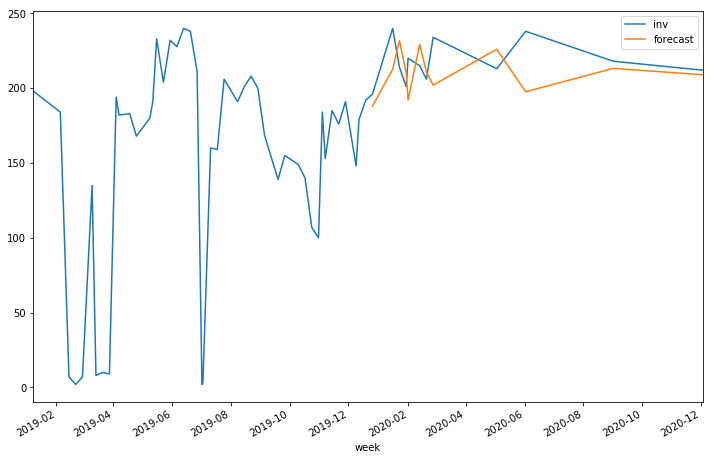

In [27]:
inv_b['forecast']=model_fit.predict(start='2019-12-26',end='2020-12-03')
inv_b[['inv','forecast']].plot(figsize=(12,8))

**Metrics**

In [28]:
farima = inv_b['forecast']['2019-12-26' : ]
actual = inv_b['inv']['2019-12-26' :]

In [47]:
actual

week
2019-12-26    196.0
2020-02-01    220.0
2020-09-01    218.0
2020-01-16    240.0
2020-01-23    214.0
2020-01-30    201.0
2020-06-02    238.0
2020-02-13    215.0
2020-02-20    206.0
2020-02-27    234.0
2020-05-03    213.0
2020-12-03    212.0
Name: inv, dtype: float64

In [46]:
farima

week
2019-12-26    187.967541
2020-02-01    192.042854
2020-09-01    213.252065
2020-01-16    212.633878
2020-01-23    231.843451
2020-01-30    210.126755
2020-06-02    197.597961
2020-02-13    229.292229
2020-02-20    210.865354
2020-02-27    202.010657
2020-05-03    226.028924
2020-12-03    208.941992
Name: forecast, dtype: float64

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(actual, farima)
mae = mean_absolute_error(actual, farima)
print('Mean Squared Error of Amberville Brand Using Arima: %f' % mse)
print('Mean Absolute Error of Amberville Brand Using Arima: %f' % mae)

Mean Squared Error of Amberville Brand Using Arima: 423.495239
Mean Absolute Error of Amberville Brand Using Arima: 16.892480


**6 Months**

In [31]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=24)[0]

In [32]:
class_b_outofsample = pd.DataFrame(data=forecast, columns=['Forecast']) #putting into dataframe

In [33]:
class_b_outofsample

,Forecast
0,207.156046
1,202.823980
2,198.803851
3,195.073199
4,191.611179
5,188.398447
6,185.417054
7,182.650341
8,180.082850
9,177.700235


**The End**